
### **Gabor** **filters** are used in image processing and computer vision for tasks such as edge detection and texture analysis. They are particularly effective in capturing the spatial frequency characteristics of an image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


## Testing ***Gabor*** Filters:

In [ ]:
#Change the path to whereever the images are in
images_path = "/fingerprints"

In [ ]:
def apply_gabor_filter(image, kernel_size, theta, lambda_val, sigma, gamma):
    """
    Apply Gabor filter to an image.

    Parameters:
    - image: Input image
    - kernel_size: Size of the Gabor kernel
    - theta: Orientation of the Gabor filter (in radians)
    - lambda_val: Wavelength of the sinusoidal factor
    - sigma: Standard deviation of the Gaussian envelope
    - gamma: Spatial aspect ratio

    Returns:
    - Filtered image
    """
    gabor_kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambda_val, gamma, 0, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

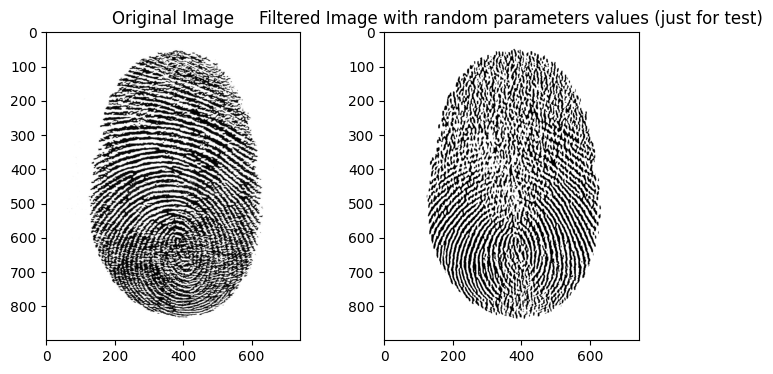

In [ ]:
## Using the Gabor filter function:

image_path = os.path.join(images_path, "finger1.jpg")
# Convert to grayscale:
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set Gabor filter parameters
kernel_size = 11
theta = 0
lambda_val = 10
sigma = 5
gamma = 0.9

# Apply Gabor filter
filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

# Display the original and filtered images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with random parameters values (just for test)')

plt.show()


## Fixing all parameters and trying a range of ***Kernal Size*** values[(3,3), (25,**25**)]:


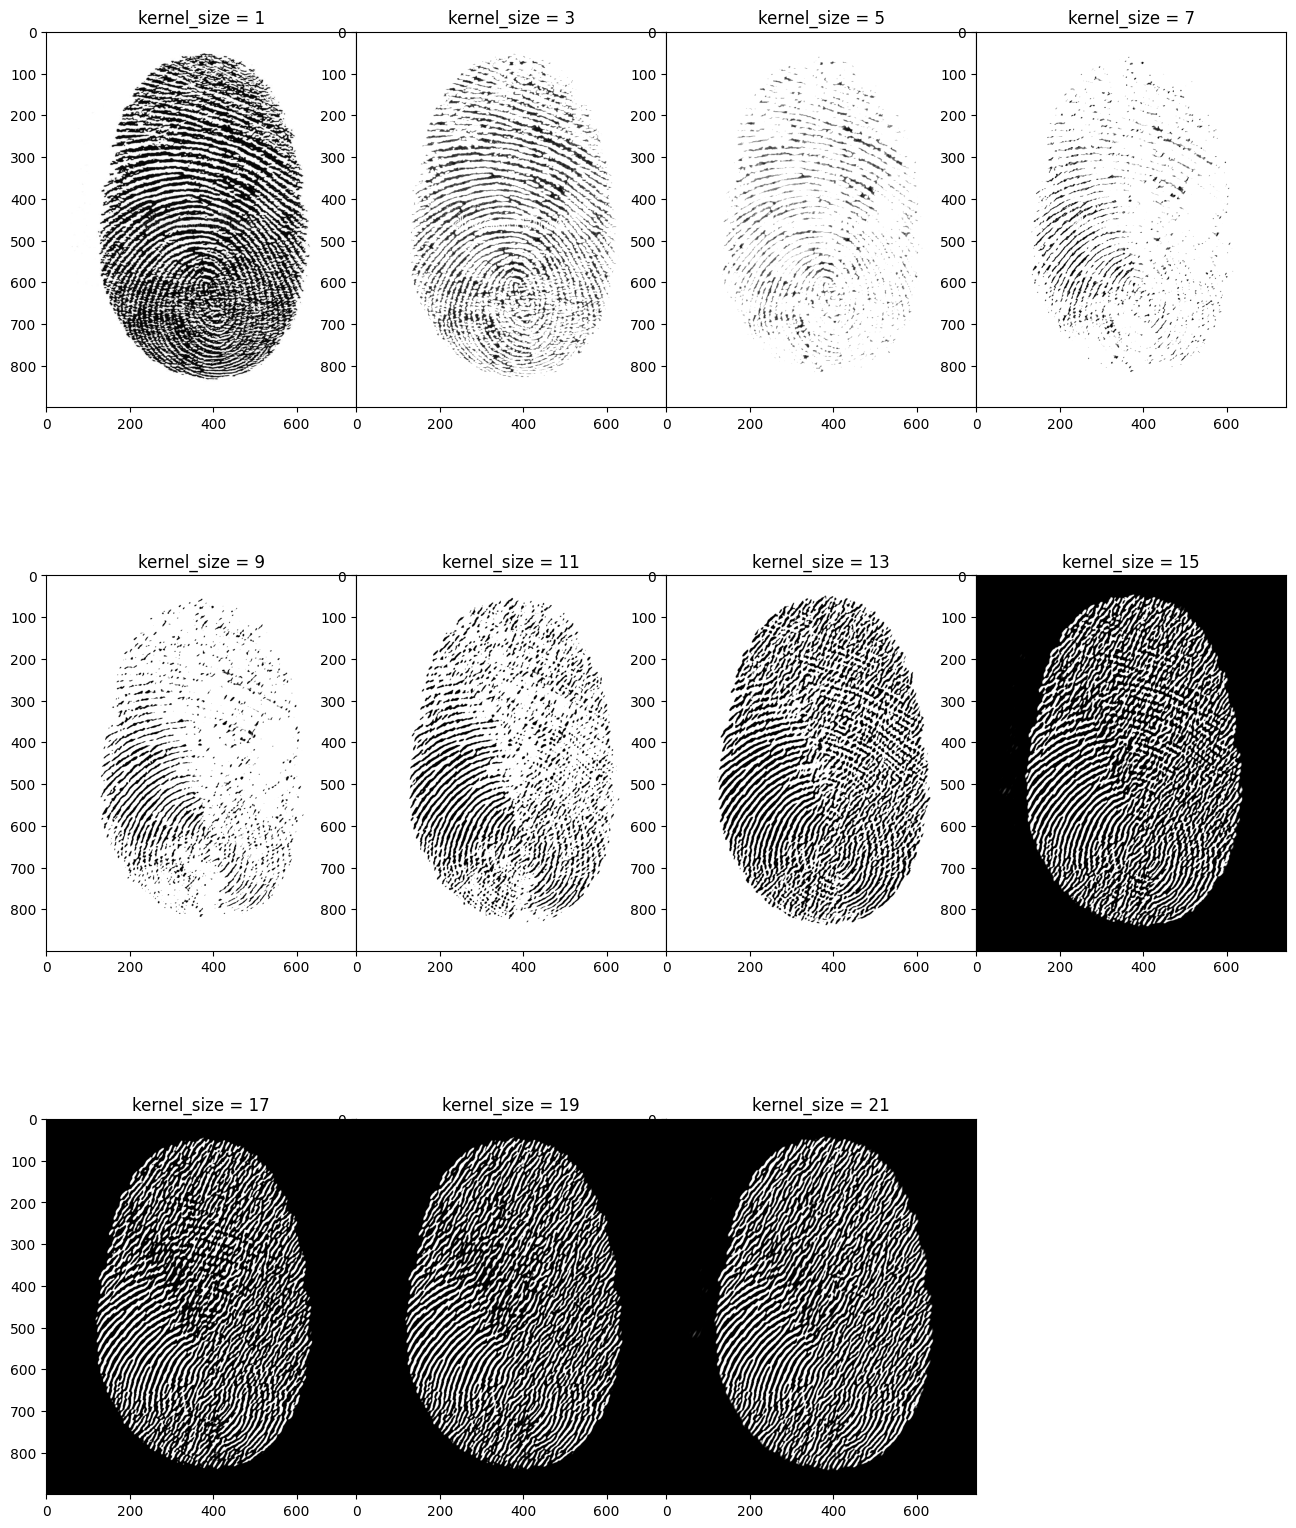

In [ ]:
kernel_sizes = list(range(1, 23, 2))

# Set Gabor filter parameters
## kernal_size to be tested and choosen from a range
theta = 0.5
lambda_val = 10
sigma = 5
gamma = 0.9

 #Visualize the network of images
plt.figure(figsize=(16, 20))
for i, kernel_size in enumerate(kernel_sizes, 1):
    filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

    # Plot the images in a grid
    plt.subplot(3, 4, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'kernel_size = {kernel_size}')
    #plt.axis('off')

plt.subplots_adjust(wspace=0)
plt.show()



#### Notes:
*   While larger kernels are effective at capturing overall patterns, there's a trade-off with the preservation of fine details.
*   Larger kernel sizes tend to have a smoothing effect on the image. They may reduce the impact of noise and fine details, leading to a more generalized representation of the image.




## Fixing all parameters and trying a range of ***theta*** values[0,270] degrees  Given that*** kernel_size*** chosen from last step


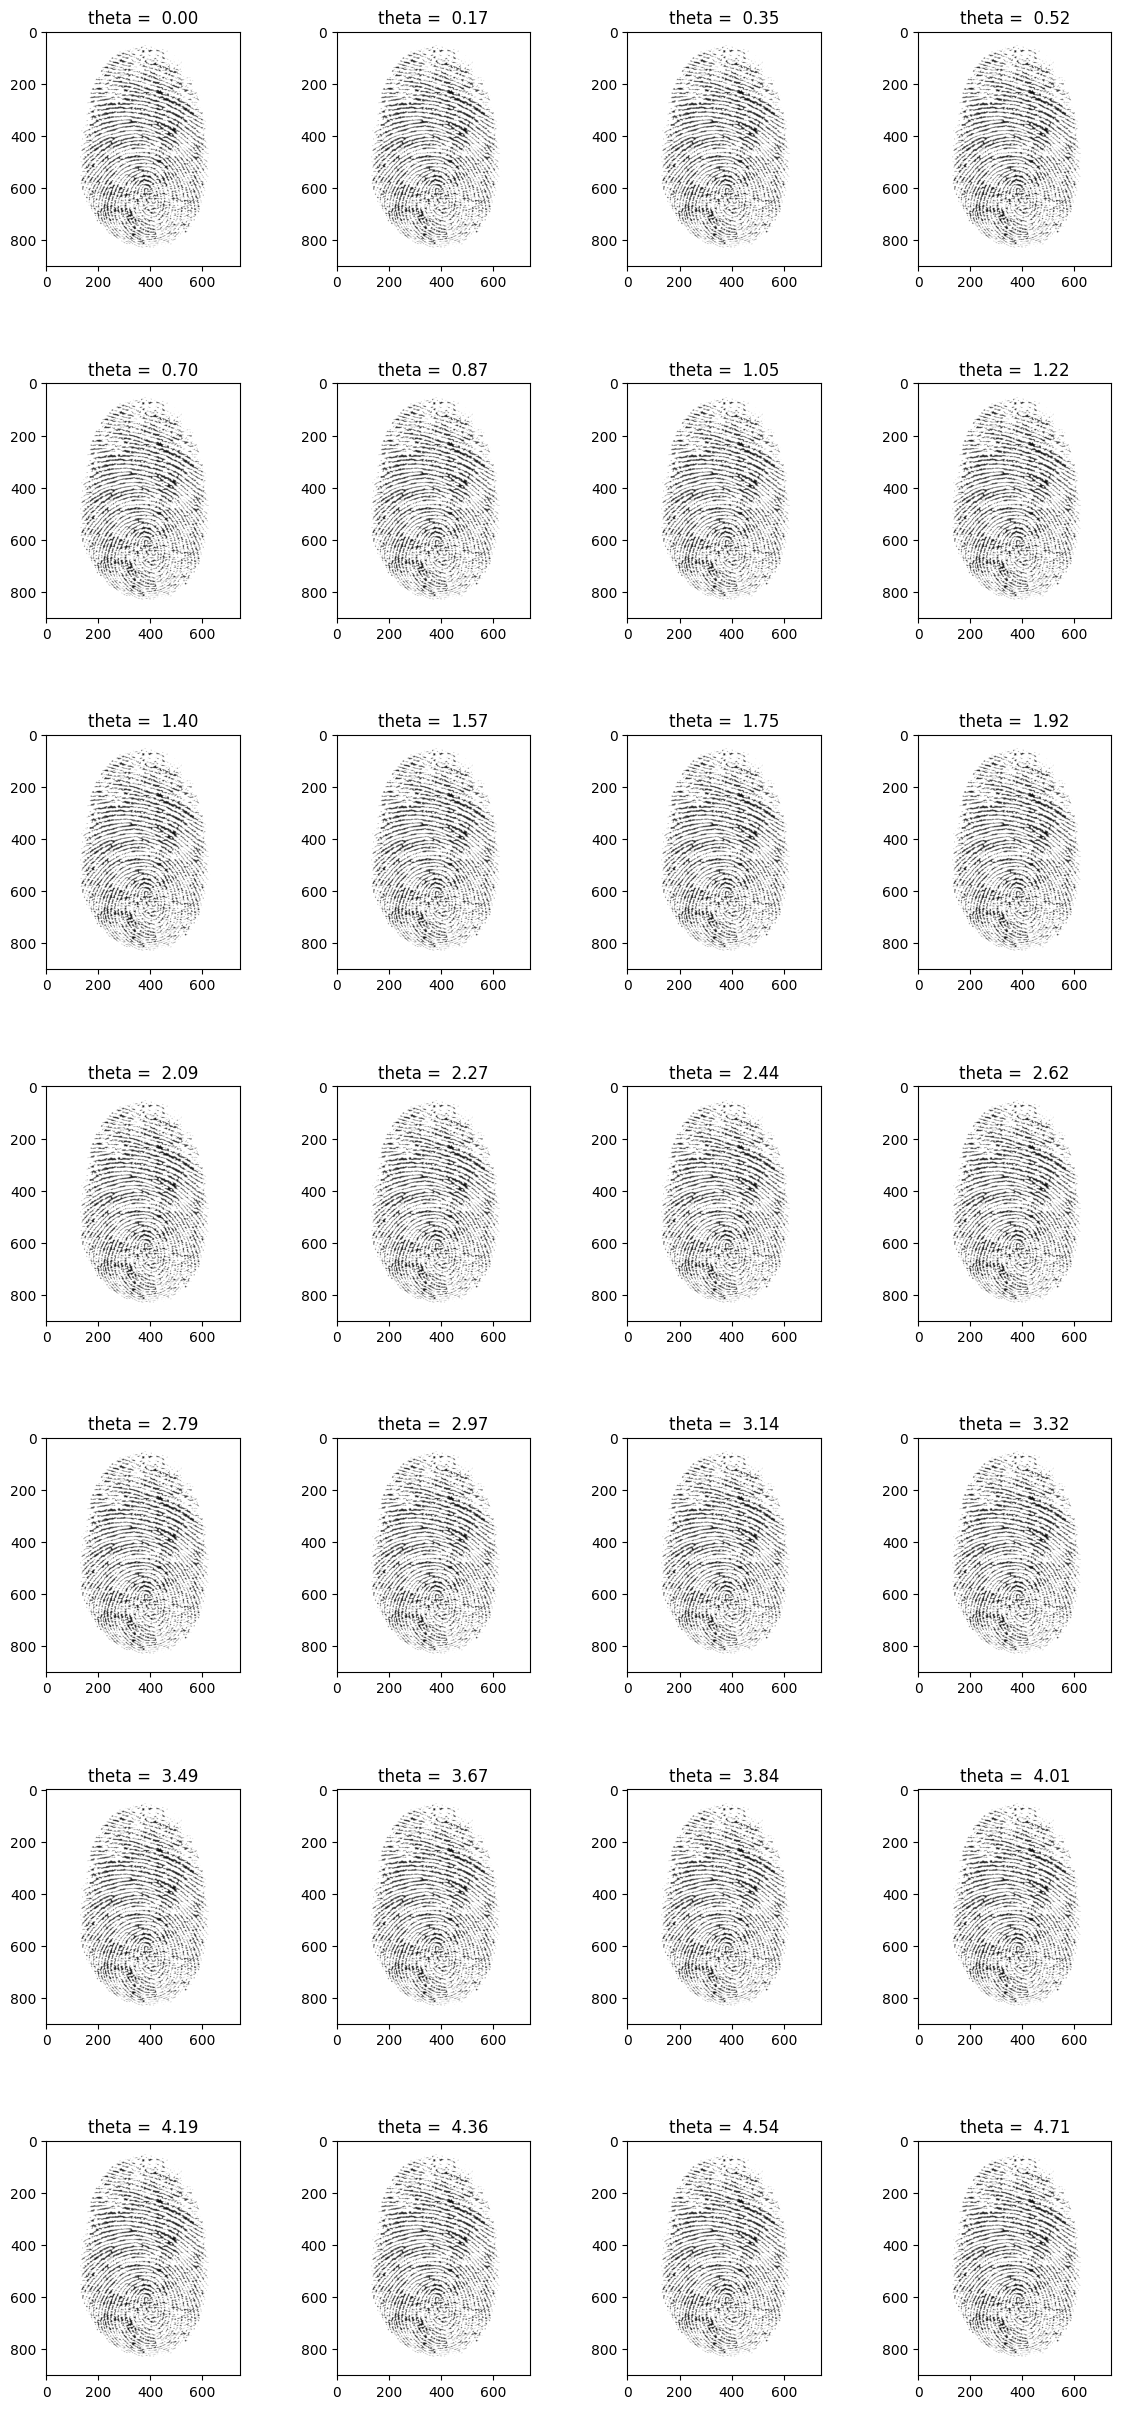

In [ ]:
# Generate a list of theta values in degrees
theta_degrees = list(range(0, 271, 10))
# Convert degrees to radians
theta_values = np.radians(theta_degrees)

# Set Gabor filter parameters
kernel_size = 3 ## choosen after careful examination
# theta will be chosen after looping through a range and picking up the best
lambda_val = 10
sigma = 5
gamma = 0.9

 #Visualize the network of images
plt.figure(figsize=(15, 35))
plt.subplots_adjust(wspace=0,hspace=0.5)
for i, theta in enumerate(theta_values, 1):
    filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

    # Plot the images in a grid
    plt.subplot(8, 4, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'theta = {theta: .2f}')
    # plt.axis('off')

plt.subplots_adjust(wspace=0)
plt.show()



##Note:


*   The Gabor filter becomes more sensitive to features oriented at the specified angle.
*   Increasing "theta" allows you to focus on extracting information along a specific orientation in the fingerprint pattern.



## Fixing all parameters and trying a range of ***gamma*** values[0.1,1.0] Given that*** kernel_size*** and ***theta*** chosen from last step


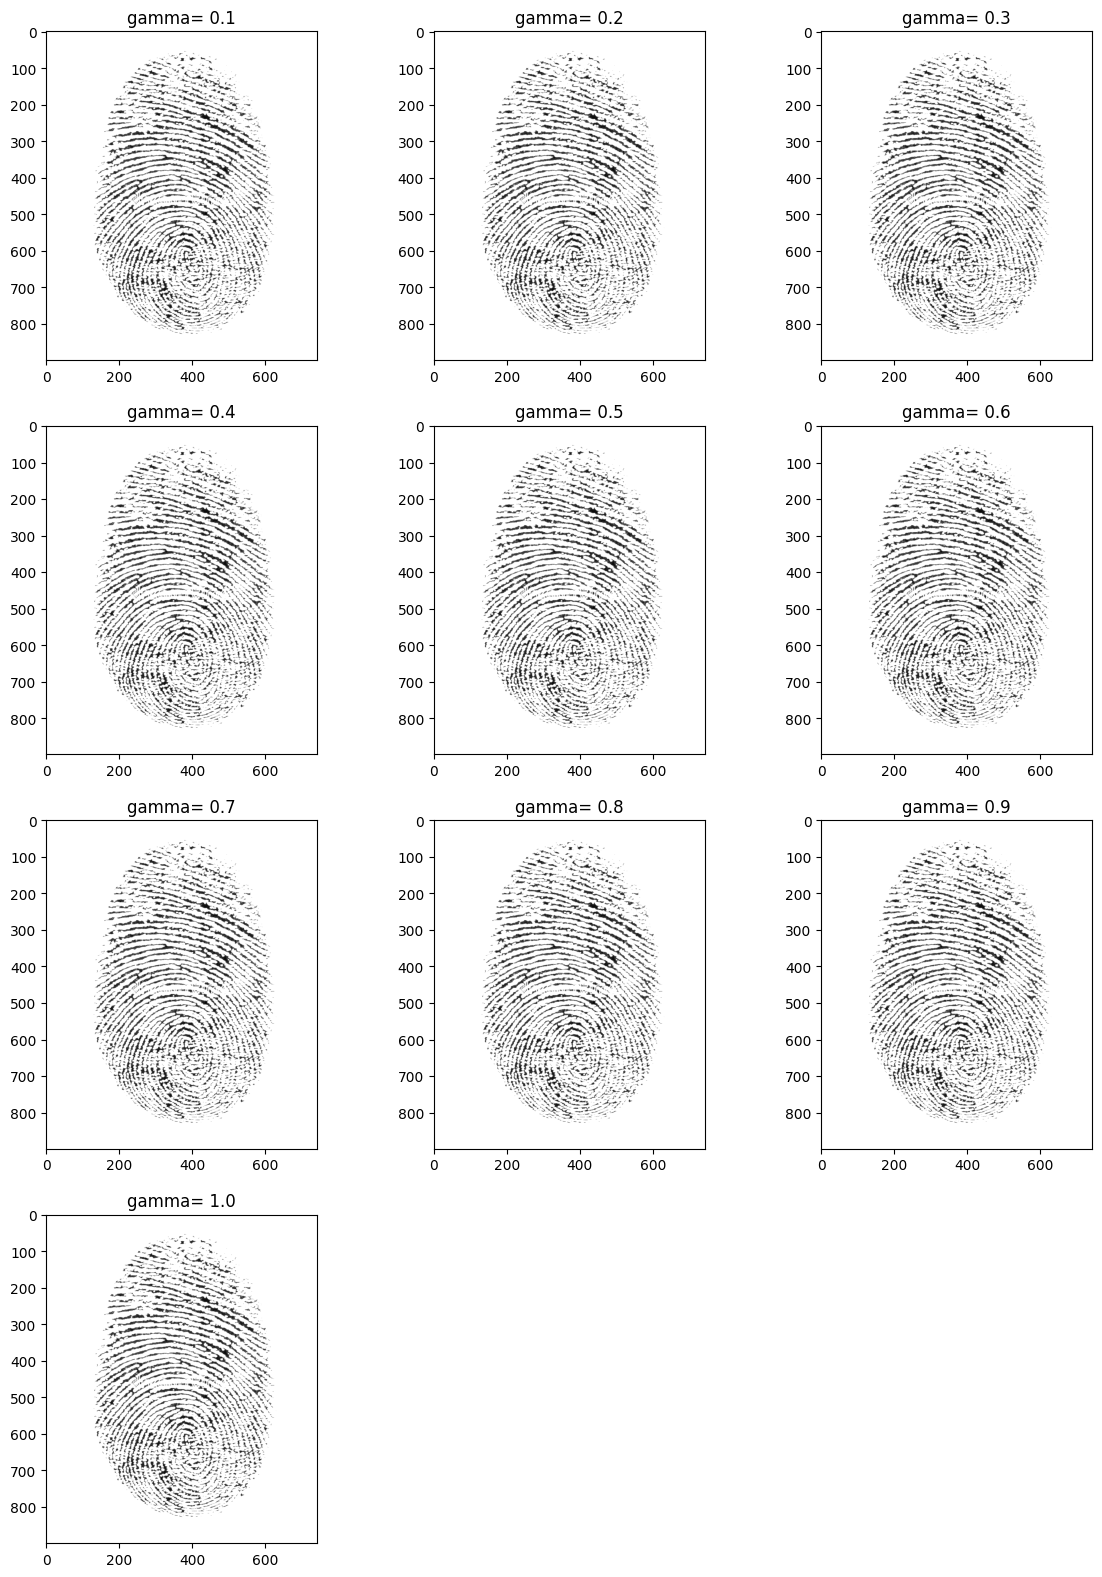

In [ ]:
gamma_values = np.linspace(0.1, 1.0, 10)

# Set Gabor filter parameters
kernel_size = 3  ## choosen after careful examination
theta = 4.01 # from last plots
lambda_val = 10
sigma = 5
# gamma to be chosen

 #Visualize the network of images
plt.figure(figsize=(15, 35))
for i, gamma in enumerate(gamma_values, 1):
    filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

    # Plot the images in a grid
    plt.subplot(7, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'gamma= {gamma:.1f}')
    # plt.axis('off')


plt.subplots_adjust(wspace=0)
plt.show()



### Note:


*   The gamma parameter controls the aspect ratio of the Gabor filter, determining the ellipticity of its response.
*   Lower gamma values (closer to 0) result in a more elongated or stretched filter response, while higher gamma values (closer to 1) produce a more circular response.
*   Lower gamma values make the Gabor filter more sensitive to features with a higher aspect ratio, such as elongated lines or edges. Higher gamma values make the filter less sensitive to the orientation of features, capturing a broader range of spatial frequencies.



### Fixing all parameters and trying a range of sigma values[ , ] Given that * **kernel_size** , **theta**, and **gamma** chosen from last step

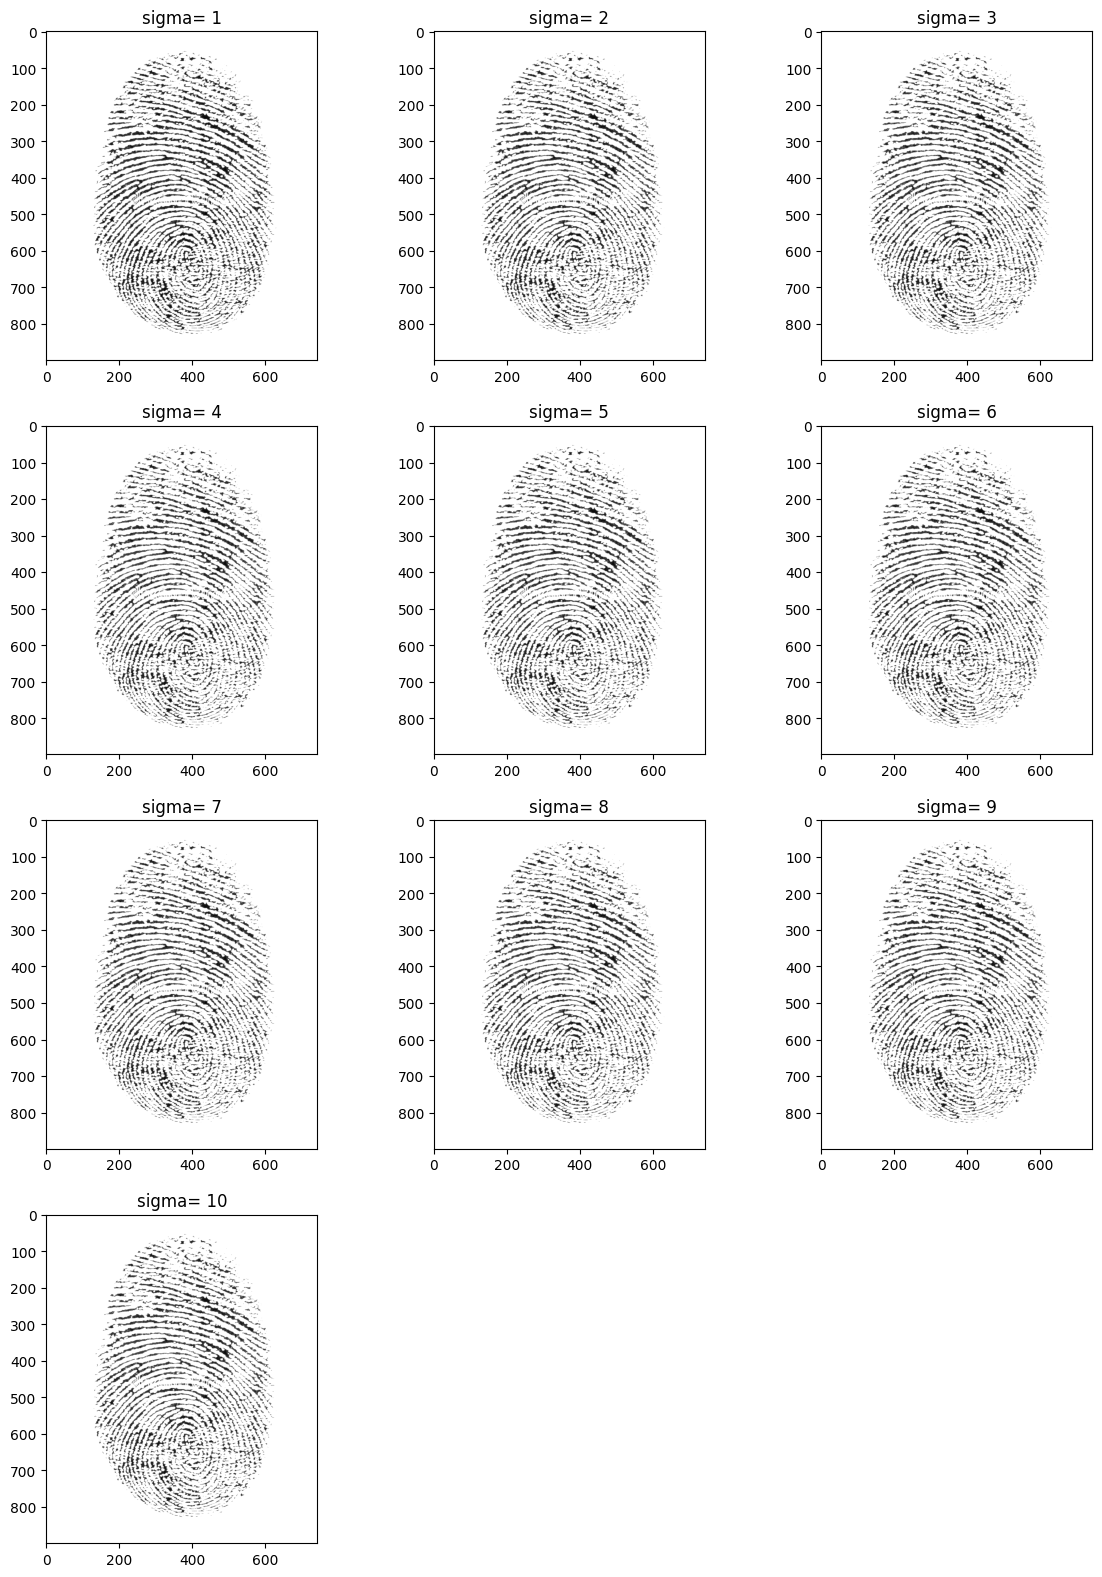

In [ ]:
sigma_values = list(range(1, 11))

# Set Gabor filter parameters
kernel_size = 3  ## choosen after careful examination
theta = 4.01 # from last plots
lambda_val = 10
# sigma to be chosen, let's try a range
gamma = 0.1

 #Visualize the network of images
plt.figure(figsize=(15, 35))
for i, sigma in enumerate(sigma_values, 1):
    filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

    # Plot the images in a grid
    plt.subplot(7, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'sigma= {sigma}')
    # plt.axis('off')


plt.subplots_adjust(wspace=0)
plt.show()



Note:


*  Small sigma values are suitable for capturing fine details and detecting small-scale features in the image.
*   And with small Sigma values, The filter becomes more sensitive to high-frequency components, which can enhance the detection of fine textures or edges.
*  And with lower Sigma values Localized Features: Smaller sigma values are effective in capturing localized features with a finer scale.
*  **Large sigma** values produce a wide Gaussian envelope, leading to a lower frequency response of the Gabor filter.
*  Large sigma values are useful for capturing global structures and larger-scale patterns in the image.
*  And with large Sigma Value, the filter becomes less sensitive to fine details and is more effective in capturing broader patterns.
*   Larger sigma values result in a smoother response, which can help reduce noise and enhance overall feature visibility.



### Trying a range of lambda values[1, 11] Given that  **kernel_size theta, gamma, and sigma** have been determined.

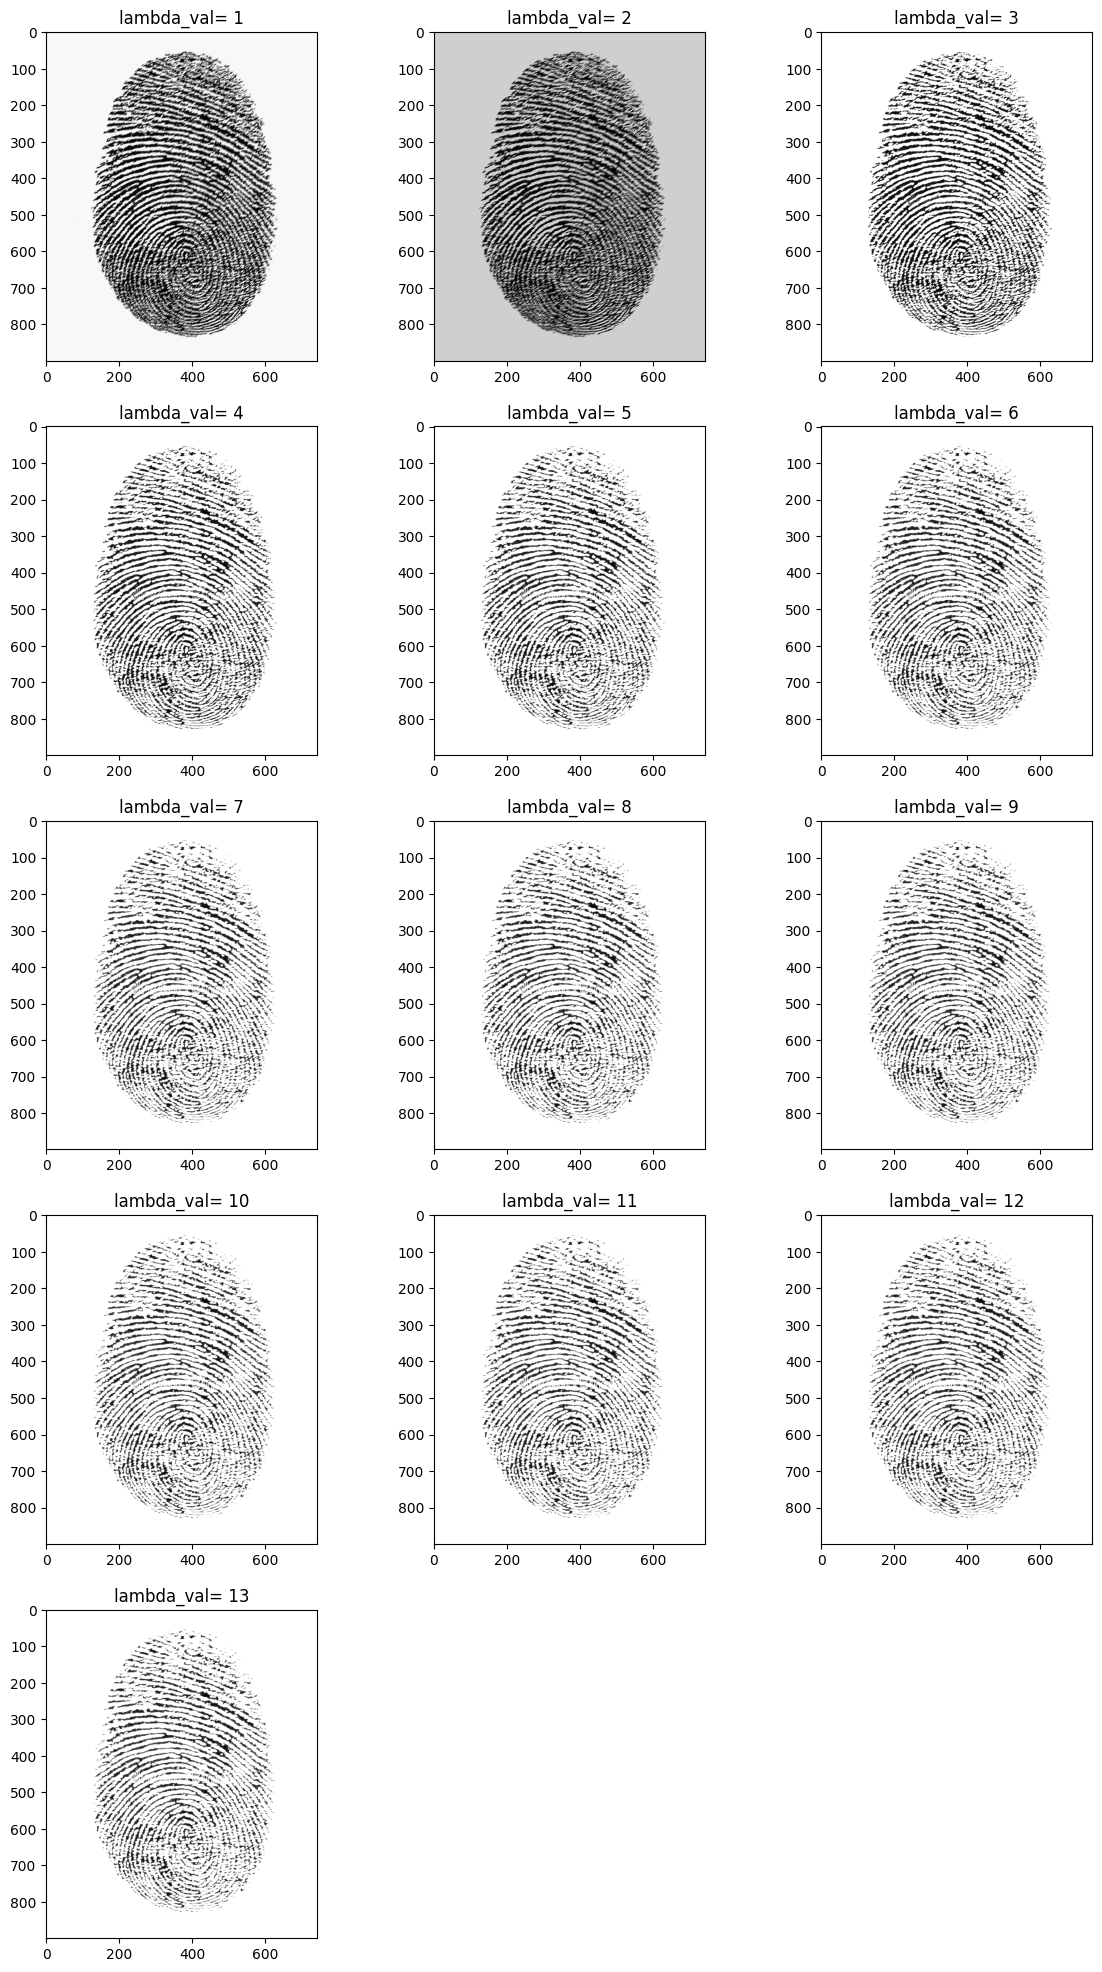

In [ ]:
lambda_values = list(range(1, 14))

# Set Gabor filter parameters
kernel_size = 3  ## choosen after careful examination
theta = 4.01 # from last plots
# lambda_val to be taken after exmination aand visualization
sigma =1
gamma = 0.1

 #Visualize the network of images
plt.figure(figsize=(15, 35))
for i, lambda_val in enumerate(lambda_values, 1):
    filtered_image = apply_gabor_filter(original_image, kernel_size, theta, lambda_val, sigma, gamma)

    # Plot the images in a grid
    plt.subplot(7, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'lambda_val= {lambda_val}')
    # plt.axis('off')


plt.subplots_adjust(wspace=0)
plt.show()



Note:


*   Smaller lambda values correspond to higher frequencies, capturing finer details and smaller-scale features in the image.
*   Larger lambda values correspond to lower frequencies, capturing broader patterns and larger-scale structures.

